In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

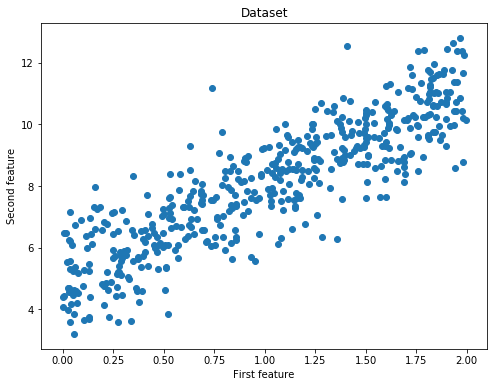

In [2]:
np.random.seed(1)

# use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)   
print(X_test.shape)     

(375, 1)
(125, 1)


In [4]:
# class defination
class LinearRegression:
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = float(np.zeros(shape=(n_features, 1)))
        self.bias = 0.0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (float(1) / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print("Cost at iteration " + str(i) + ": " + str(cost))
            # Step 3: Compute the gradients
            dJ_dw = (float(2) / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (float(2) / n_samples) * np.sum((y_predict - y))

            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0

        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 70.0392705401
Cost at iteration 100: 2.11037526538
Cost at iteration 200: 1.29769233881
Cost at iteration 300: 1.20862581199
Cost at iteration 400: 1.14846610316
Cost at iteration 500: 1.10433684493


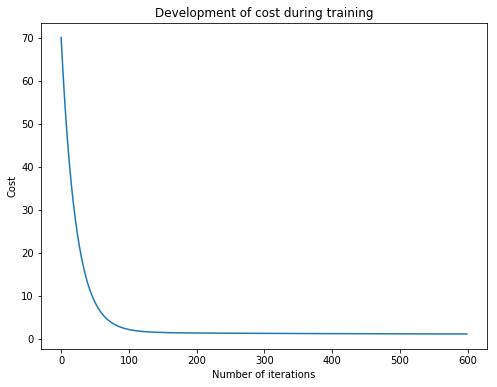

In [5]:
# Training with gradient descent
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [6]:
# Testing (gradient descent model)
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (float(1) / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (float(1) / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print("Error on training set: " + str(np.round(error_train, 4)))
print("Error on test set: " + str(np.round(error_test, 4)))


Error on training set: 1.0719
Error on test set: 1.1034


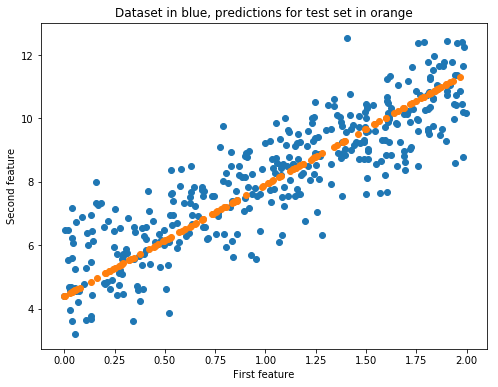

In [7]:
# Visualize test predictions
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()